# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
import os

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
5282,id_5282,Madrid,NaN,2735.0,NaN,23.0,"[['Moroccan food in Madrid. Tasty Couscous!', ...",/Restaurant_Review-g187514-d10086639-Reviews-L...,d10086639,0,0.0
42753,id_6980,Barcelona,['Mediterranean'],6981.0,$$ - $$$,2.0,"[['Culinary heaven!!!!!'], ['11/25/2017']]",/Restaurant_Review-g187497-d12996014-Reviews-L...,d12996014,1,3.0
39765,id_1662,Madrid,"['Bar', 'Mediterranean', 'Spanish']",1664.0,$$ - $$$,132.0,"[['It’s a chain, but a pleasant one', 'A taste...",/Restaurant_Review-g187514-d7249855-Reviews-Ta...,d7249855,1,4.0
30357,id_3340,Milan,['Italian'],3342.0,$$ - $$$,6.0,"[[], []]",/Restaurant_Review-g187849-d12940625-Reviews-L...,d12940625,1,4.0
25467,id_845,Athens,"['Mediterranean', 'Greek', 'Fast Food']",847.0,$,28.0,"[['amazing food', 'Superb souvlaki'], ['10/12/...",/Restaurant_Review-g189400-d4424476-Reviews-Gr...,d4424476,1,4.5


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

In [14]:
#  функция для определения границ выбросов
def outliers (num_col):
    IQR = data[num_col].quantile(0.75) - data[num_col].quantile(0.25)
    perc25 = data[num_col].quantile(0.25)
    perc75 = data[num_col].quantile(0.75)
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    anomaly = len(data[data[num_col] > l]) + len(data[data[num_col] < f]) # определяем кол-во значений попавших в выброс
    print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{},{}]".format(f, l))
    print("Выбросов, согласно IQR: {} | {:2.2%}".format(
        anomaly, anomaly/len(data)))

# Очистка и подготовка данных


## 1. Обработка NAN 


Столбец ***Cuisine Style***.
Содержит информацию о видах кухонь в ресторане.
Так как вариантов и вариаций кухонь может быть бесконечное количесво заменим пропуски значение "other"

In [15]:
# Заполняем пропуски в кухнях
data['Cuisine Style'] = data['Cuisine Style'].fillna('othen')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      50000 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Столбец ***Price Range***.
Содержит информацуию об уровне цен в ресторане.
Имеет достаточно много пропусков (около 35%).
Будем заполнять медианой значением относительно города в котором находится ресторан.
Так же данный признак является категориальным, но не будем пользоваться специальными функциями для создания категориального признака, а просто заменим текущее значение на числовые значения. Так как рейтинг ресторана скорее всего зависит от уровня цены в данном ресторане.

In [16]:
# определим виды цен
display(data['Price Range'].unique())
display(data['Price Range'].value_counts())

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [17]:
# Price Range ЗАПОЛНЯЕМ ПРОПУСКИ
data['Price Range'] = data['Price Range'].apply(lambda x: 1 if x == '$'else 2 if x == '$$ - $$$' else 3 if x == '$$$$' else x)
# посмотрим средний ценовой диапозон в городах
display(data.groupby('City').median()['Price Range'].round())
# в городах привалирует второй тип диапозона цен, этим значением заполним пропуски
data['Price Range'] = data['Price Range'].fillna(2)

City
Amsterdam     2.0
Athens        2.0
Barcelona     2.0
Berlin        2.0
Bratislava    2.0
Brussels      2.0
Budapest      2.0
Copenhagen    2.0
Dublin        2.0
Edinburgh     2.0
Geneva        2.0
Hamburg       2.0
Helsinki      2.0
Krakow        2.0
Lisbon        2.0
Ljubljana     2.0
London        2.0
Luxembourg    2.0
Lyon          2.0
Madrid        2.0
Milan         2.0
Munich        2.0
Oporto        2.0
Oslo          2.0
Paris         2.0
Prague        2.0
Rome          2.0
Stockholm     2.0
Vienna        2.0
Warsaw        2.0
Zurich        2.0
Name: Price Range, dtype: float64

Столбец ***Number of Reviews***.
Содержит информацию о кал-ве отзывово о ресторане. Содержит пропуски, но это не значит что данные пропущены, возможно их просто нет. Поэтому пропуски заполним "0"

In [18]:
# заполняем пропуски
data['Number of Reviews'] = data['Number of Reviews'].fillna(0)

In [19]:
# посмотрим как обстоят дела с выбросами
outliers('Number of Reviews')

25-й перцентиль: 7.0, 75-й перцентиль: 105.0, IQR: 98.0,  Границы выбросов: [-140.0,252.0]
Выбросов, согласно IQR: 5946 | 11.89%


<AxesSubplot:>

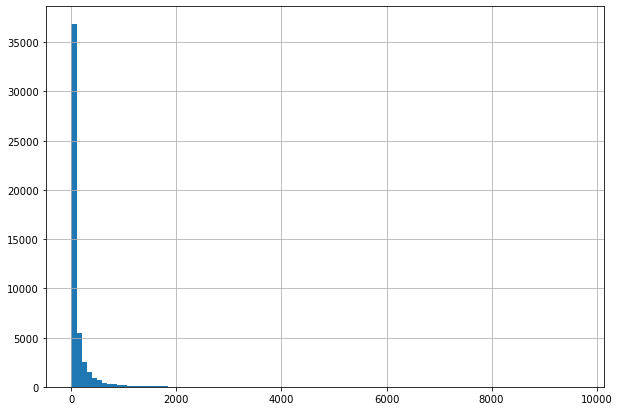

In [20]:
# посмотрим как выглятит распределения на гистаграмме
plt.rcParams['figure.figsize'] = (10,7)
data['Number of Reviews'].hist(bins=100)

<AxesSubplot:>

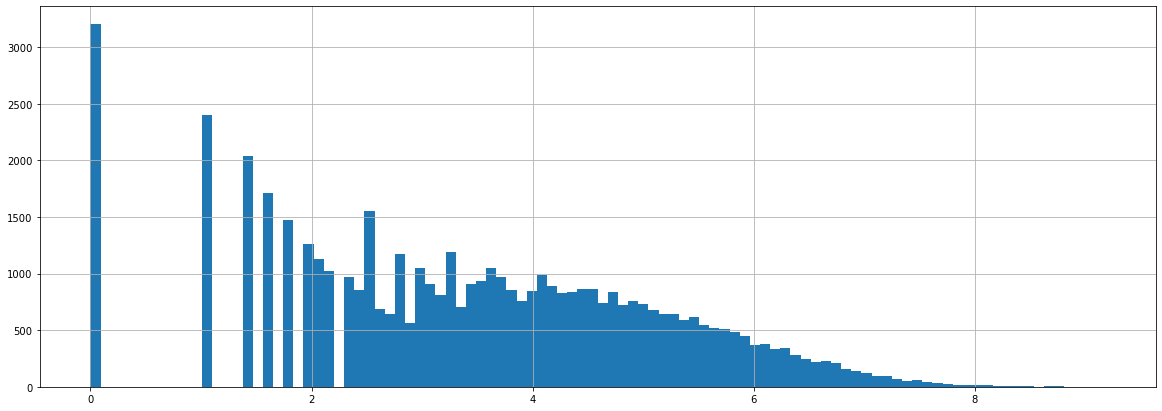

In [21]:
# попробуем нормализовать данные 
plt.rcParams['figure.figsize'] = (20,7)
np.log(data['Number of Reviews'] + 1).hist(bins=100)

In [22]:
# создадим новый  столбец с полученными данными и посмотрим как именилась ситуация с выбросами
data['log Number of Reviews'] = np.log(data['Number of Reviews'] + 1)
outliers('log Number of Reviews')

25-й перцентиль: 2.0794415416798357, 75-й перцентиль: 4.663439094112067, IQR: 2.583997552432231,  Границы выбросов: [-1.7965547869685108,8.539435422760413]
Выбросов, согласно IQR: 12 | 0.02%


Столбец ***Reviews***.
Пока данное просто заполним пропуски

In [23]:
data['Reviews'] = data['Reviews'].fillna('other')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          50000 non-null  object 
 1   City                   50000 non-null  object 
 2   Cuisine Style          50000 non-null  object 
 3   Ranking                50000 non-null  float64
 4   Price Range            50000 non-null  float64
 5   Number of Reviews      50000 non-null  float64
 6   Reviews                50000 non-null  object 
 7   URL_TA                 50000 non-null  object 
 8   ID_TA                  50000 non-null  object 
 9   sample                 50000 non-null  int64  
 10  Rating                 50000 non-null  float64
 11  log Number of Reviews  50000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 4.6+ MB


Все пропуски заполнены.

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [25]:
data.nunique(dropna=False)

Restaurant_id            13094
City                        31
Cuisine Style            10732
Ranking                  12975
Price Range                  3
Number of Reviews         1574
Reviews                  41858
URL_TA                   49963
ID_TA                    49963
sample                       2
Rating                      10
log Number of Reviews     1574
dtype: int64

In [26]:
# создадим первый категориальный признак на основе городов с помощью функции get_dummies
dummy_city = pd.get_dummies(data.City)
data = pd.concat([data, dummy_city], axis=1)

In [27]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
45759,id_888,Hamburg,"['Italian', 'Pizza', 'Delicatessen']",890.0,2.0,30.0,"[['Fresh and delicious Italian food!', 'Real I...",/Restaurant_Review-g187331-d954488-Reviews-Ris...,d954488,1,...,0,0,0,0,0,0,0,0,0,0
41540,id_2518,Berlin,othen,2520.0,2.0,10.0,"[['Always good beer on tap!', 'Cool'], ['06/11...",/Restaurant_Review-g187323-d7113705-Reviews-Sl...,d7113705,1,...,0,0,0,0,0,0,0,0,0,0
43563,id_14395,London,['Italian'],14406.0,2.0,101.0,"[['Fabulous', 'Do NOT go there'], ['12/12/2017...",/Restaurant_Review-g186338-d2043262-Reviews-La...,d2043262,1,...,0,0,0,0,0,0,0,0,0,0
15540,id_1440,Prague,"['European', 'Czech', 'Central European', 'Bar...",1442.0,2.0,23.0,[['Hmm not sure what to think about this plac....,/Restaurant_Review-g274707-d4768729-Reviews-Na...,d4768729,1,...,0,0,0,0,1,0,0,0,0,0
29040,id_1346,Rome,"['Chinese', 'Japanese', 'Sushi', 'Asian', 'Veg...",1347.0,2.0,517.0,"[['Good soba', 'A great dinner experience!'], ...",/Restaurant_Review-g187791-d3775249-Reviews-Su...,d3775249,1,...,0,0,0,0,0,1,0,0,0,0


Возьмем следующий признак "**Cuisine Style**".

In [29]:
# создадим признак по кол-ву видов кухни в ресторане
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace('[',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(']',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(' ',''))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split(','))
data['cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

Создадим следующий признак на основе кол-во ресторанов в городе

In [30]:
data['City'].value_counts()
rest_count = (data['City'].value_counts()).reset_index()
rest_count.rename(columns = {'index':'City','City':'rest_count'}, inplace = True)
data = data.merge(rest_count, on='City', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          50000 non-null  object 
 1   City                   50000 non-null  object 
 2   Cuisine Style          50000 non-null  object 
 3   Ranking                50000 non-null  float64
 4   Price Range            50000 non-null  float64
 5   Number of Reviews      50000 non-null  float64
 6   Reviews                50000 non-null  object 
 7   URL_TA                 50000 non-null  object 
 8   ID_TA                  50000 non-null  object 
 9   sample                 50000 non-null  int64  
 10  Rating                 50000 non-null  float64
 11  log Number of Reviews  50000 non-null  float64
 12  Amsterdam              50000 non-null  uint8  
 13  Athens                 50000 non-null  uint8  
 14  Barcelona              50000 non-null  uint8  
 15  Be

Посмотрим на столбец "**Restaurant_id**"

In [31]:
# есть ли повторяющихся значения в данном столбце
data['Restaurant_id'].value_counts()

id_436      19
id_227      19
id_633      19
id_871      19
id_585      18
            ..
id_9997      1
id_6577      1
id_10210     1
id_9841      1
id_13782     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [32]:
# судя по значениям есть рестораны которые являются сетевыми
# создадми новый признак: сетевой ресторан или нет

In [33]:
chain = (data['Restaurant_id'].value_counts()>2).reset_index()
chain["Restaurant_id"] = chain["Restaurant_id"].apply(lambda x : 1 if x==True else 0)
chain.rename(columns = {'index':'Restaurant_id','Restaurant_id':'chain'}, inplace = True)
data = data.merge(chain, on='Restaurant_id', how='left')

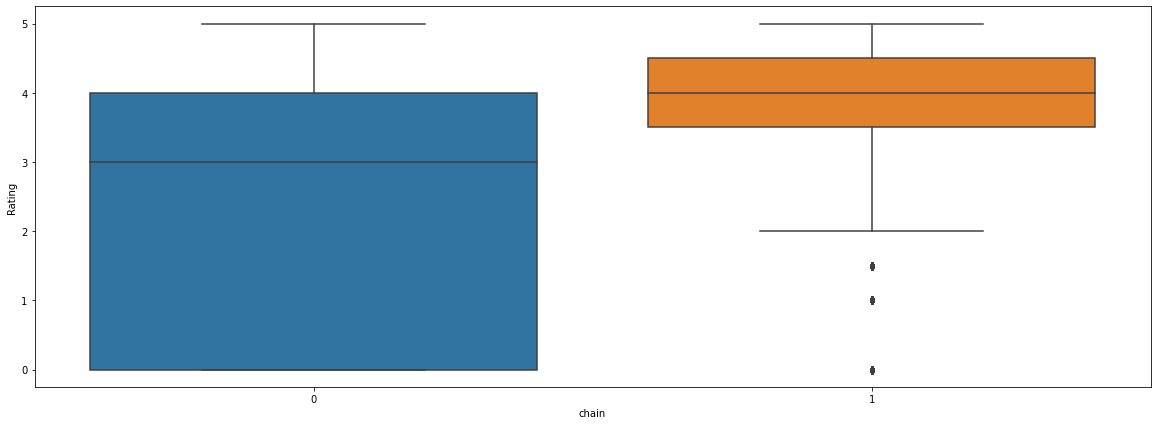

In [34]:
# посмотрим что получилось по данному признаку
ax = sns.boxplot(x="chain", y="Rating", data=data)

судя по графику данный признак имеет место быть, так как видно что у сетевых ресторанов в среднем рейтинг выше чем у несетевых.

Посмотрим на столбец "**ID_TA**"

In [35]:
# посмотрим повторяются ли значения, проверим имеют ли они один формат
df_ID_TA = data.ID_TA.value_counts()[:].reset_index()
df_ID_TA['index_len'] = df_ID_TA['index'].apply(lambda x : len(x))
display(df_ID_TA['index_len'].unique())
display(df_ID_TA['index_len'].value_counts())

# в итоге видим что данный столбец имеет 3 формата написания, тогда попробуем создать на данной информации новый признак

array([8, 9, 7], dtype=int64)

8    33881
9    12041
7     4041
Name: index_len, dtype: int64

In [36]:
# 
df_ID_TA.rename(columns = {'index':'ID_TA','ID_TA':'ID_TA_cnt','index_len':'ID_TA_len'}, inplace = True)
data = data.merge(df_ID_TA, on='ID_TA', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_id          50000 non-null  object 
 1   City                   50000 non-null  object 
 2   Cuisine Style          50000 non-null  object 
 3   Ranking                50000 non-null  float64
 4   Price Range            50000 non-null  float64
 5   Number of Reviews      50000 non-null  float64
 6   Reviews                50000 non-null  object 
 7   URL_TA                 50000 non-null  object 
 8   ID_TA                  50000 non-null  object 
 9   sample                 50000 non-null  int64  
 10  Rating                 50000 non-null  float64
 11  log Number of Reviews  50000 non-null  float64
 12  Amsterdam              50000 non-null  uint8  
 13  Athens                 50000 non-null  uint8  
 14  Barcelona              50000 non-null  uint8  
 15  Be

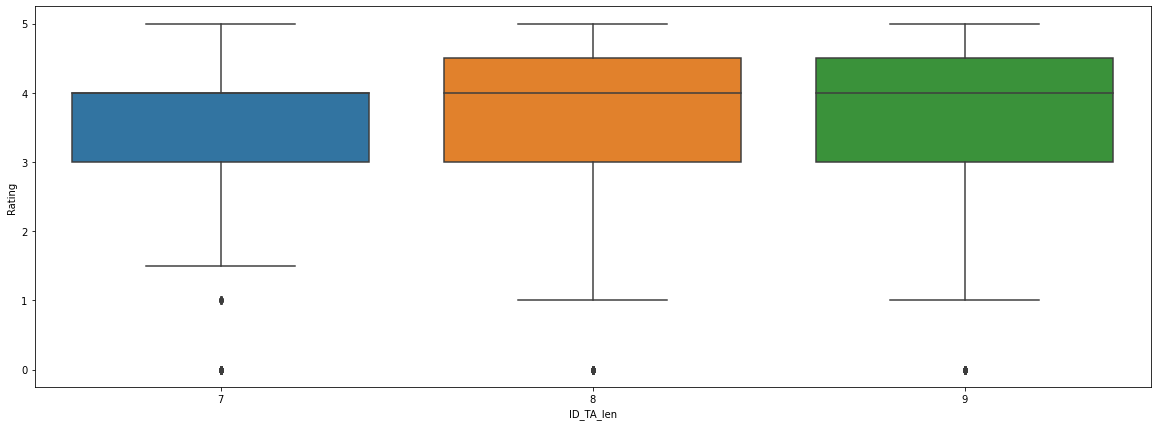

In [37]:
ax = sns.boxplot(x="ID_TA_len", y="Rating", data=data)

# по графику видно что группу 8 и 9 можно обьединить в одну, так как они идентичны

In [38]:
data['ID_TA_type']= data.ID_TA_len.apply(lambda x : 1 if x > 7 else 0)
data.drop(['ID_TA_cnt'], axis = 1, inplace = True)

# оставим признаки ID_TA_len, ID_TA_type

### Посмотрим распределение признака

<AxesSubplot:>

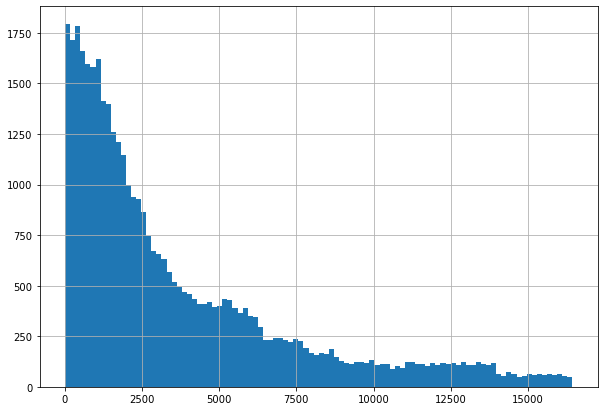

In [39]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

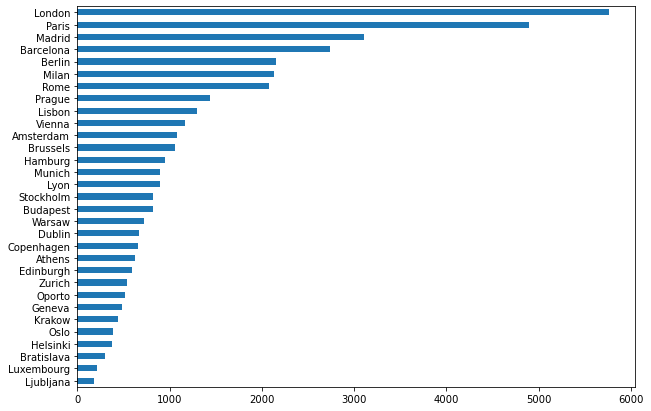

In [40]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

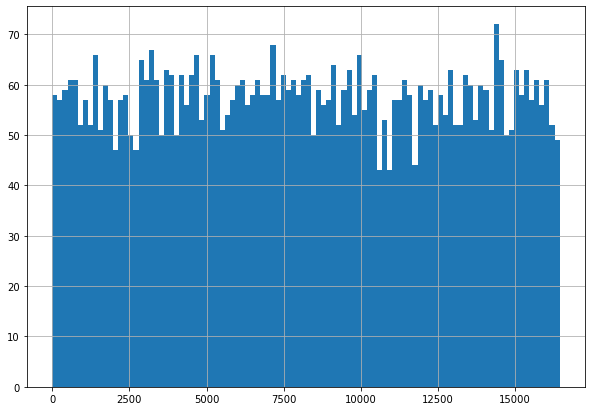

In [41]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

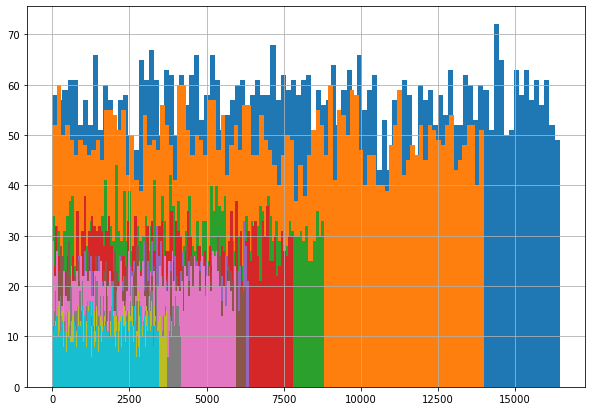

In [42]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

In [43]:
# произведем нормализацию данных по полям Ranking и rest_count
scaler = MinMaxScaler()#StandardScaler()
Ranking_norm = scaler.fit_transform(data.loc[:,['Ranking','rest_count' ]])
df_norm_Ranking = pd.DataFrame(Ranking_norm, columns = ['Ranking_norm','rest_count_norm'])

data['Ranking_norm'] = df_norm_Ranking['Ranking_norm']
data['rest_count_norm'] = df_norm_Ranking['rest_count_norm']

### Посмотрим распределение целевой переменной

<AxesSubplot:>

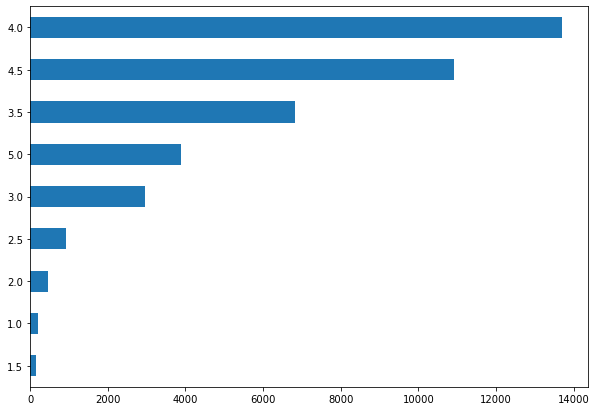

In [44]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

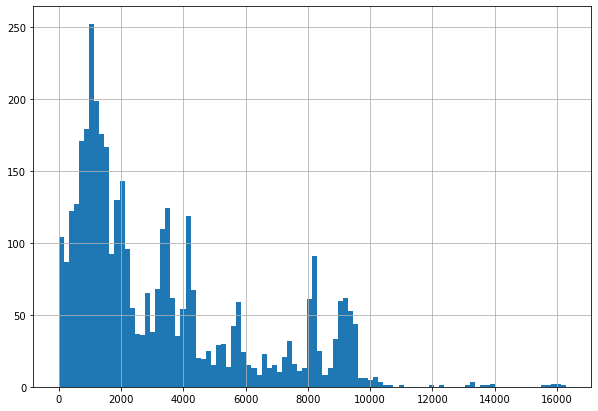

In [45]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

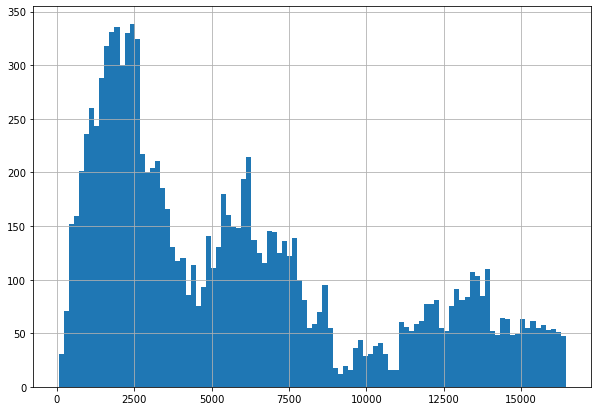

In [46]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

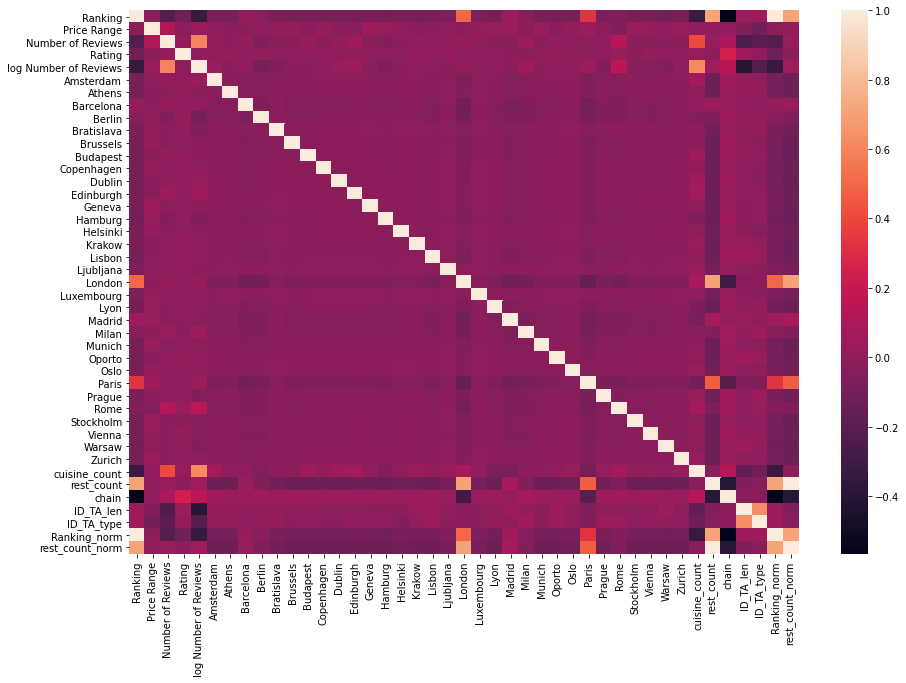

In [47]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing

In [48]:
df_preproc = data.copy()
df_preproc = df_preproc.drop(['Restaurant_id', 'City', 'Cuisine Style','Reviews','URL_TA','ID_TA','Number of Reviews','Ranking','rest_count'], axis=1)
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)
df_preproc

,Price Range,sample,Rating,log Number of Reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,...,Stockholm,Vienna,Warsaw,Zurich,cuisine_count,chain,ID_TA_len,ID_TA_type,Ranking_norm,rest_count_norm
0,2.0,0,0.0,1.609438,0,0,0,0,0,0,...,0,0,0,0,2,1,9,1,0.788299,0.844355
1,2.0,0,0.0,4.584967,0,0,0,0,0,0,...,0,0,0,0,5,1,8,1,0.006386,0.036293
2,2.0,0,0.0,3.367296,0,0,0,0,0,0,...,0,0,0,0,1,1,9,1,0.049200,0.075025
3,3.0,0,0.0,5.313206,0,0,0,0,0,0,...,0,0,0,0,5,1,7,0,0.101441,1.000000
4,3.0,0,0.0,5.093750,0,0,0,0,1,0,...,0,0,0,0,6,1,8,1,0.002189,0.022665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,1,4.5,4.382027,0,0,0,0,0,0,...,0,0,0,0,4,1,8,1,0.030347,0.354612
49996,2.0,1,3.5,6.297109,0,0,0,0,0,0,...,0,0,0,0,5,1,8,1,0.385574,0.844355
49997,2.0,1,4.5,1.609438,0,0,0,0,0,0,...,1,0,0,0,2,1,7,0,0.100407,0.116339
49998,2.0,1,4.0,4.262680,0,0,0,0,0,0,...,0,0,1,0,5,1,8,1,0.038922,0.100846


**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [49]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [50]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 40), (40000, 40), (40000, 39), (32000, 39), (8000, 39))

# Model 
Сам ML

In [51]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [52]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [53]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
# Так как признак рейтинга имеет шаг 0.5, округляем предсказание.
y_pred = np.round(y_pred * 2) / 2

In [55]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1808125


<AxesSubplot:>

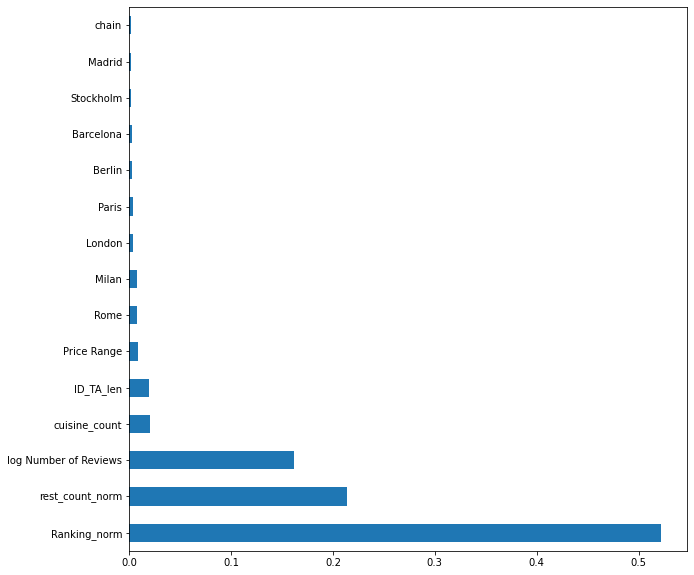

In [56]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [57]:
test_data.sample(10)

,Price Range,Rating,log Number of Reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,...,Stockholm,Vienna,Warsaw,Zurich,cuisine_count,chain,ID_TA_len,ID_TA_type,Ranking_norm,rest_count_norm
8173,2.0,0.0,3.637586,0,0,0,0,0,0,0,...,0,0,0,0,1,0,8,1,0.697987,0.844355
5262,2.0,0.0,4.356709,0,0,0,0,0,0,0,...,0,0,0,0,3,1,8,1,0.138661,0.354612
8799,2.0,0.0,2.564949,0,0,0,0,0,0,0,...,1,0,0,0,1,1,8,1,0.050295,0.116339
8128,2.0,0.0,1.609438,0,0,0,0,0,0,0,...,0,0,0,0,2,0,8,1,0.693730,0.844355
2052,2.0,0.0,6.156979,0,0,0,0,0,0,0,...,0,0,0,0,6,1,8,1,0.323664,1.000000
5499,2.0,0.0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,1,8,1,0.174725,0.204418
8245,2.0,0.0,1.791759,0,0,0,0,0,0,0,...,0,0,0,0,1,0,8,1,0.932920,1.000000
2015,2.0,0.0,3.583519,0,0,0,0,0,0,0,...,0,0,0,0,4,1,8,1,0.070729,0.088079
6055,2.0,0.0,2.564949,0,0,0,0,0,0,0,...,1,0,0,0,2,1,7,0,0.108131,0.116339
6894,2.0,0.0,3.433987,0,0,0,0,0,0,0,...,0,0,0,0,5,1,9,1,0.133674,1.000000


In [58]:
test_data = test_data.drop(['Rating'], axis=1)

In [59]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [60]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [61]:
np.round(predict_submission * 2) / 2

array([3. , 4. , 4.5, ..., 3. , 4.5, 4. ])

In [62]:
sample_submission['Rating'] = np.round(predict_submission * 2) / 2
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


Вывод
Была проведена работа по обработки и подготовки данных для обучения модели.
Результатом остался условно доволен так как еще не на все 100% произведена работа по поиску признаков. Есть куда расти.
Буду и дальше работать с этими данными для улучшения своих результатов.